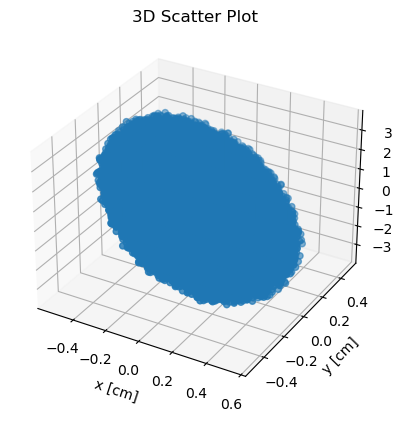

In [120]:
import math

data = []  # List to store the data
filename = "coord.out"

class Particle:
    def __init__(self, Nseed, iq, dt, dW, x, x_prime, y, y_prime):
        self.Nseed = Nseed
        self.iq = iq
        self.dt = dt
        self.dW = dW
        self.x = x
        self.x_prime = x_prime
        self.y = y
        self.y_prime = y_prime
        self.z = 0

    def __repr__(self):
        return f"Particle(Nseed={self.Nseed}, iq={self.iq}, dt={self.dt}, dW={self.dW}, x={self.x}, x'={self.x_prime}, y={self.y}, y'={self.y_prime})"

    def propagate(self, distance):
        import math
        # print(str(self.x) + " " + str(self.y), end=" ")
        # convert angles from milliradians to radians
        angle_x = self.x_prime / 1000 
        angle_y = self.y_prime / 1000
        # print("->", end=" ")
        # calculate new positions
        self.x += distance * math.tan(angle_x)
        self.y += distance * math.tan(angle_y)
        # print(str(self.x) + " " + str(self.y))


data = []  # List to store the data
filename = "coord.out"

with open(filename, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        line = line.strip()
        if line:
            values = line.split()
            particle = Particle(
                Nseed=int(values[0]),
                iq=int(values[1]),
                dt=float(values[2]),
                dW=float(values[3]),
                x=float(values[4]),
                x_prime=float(values[5]),
                y=float(values[6]),
                y_prime=float(values[7])
            )
            data.append(particle)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assume data is list of Particles
x_vals = [particle.x for particle in data]
y_vals = [particle.y for particle in data]
z_vals = [particle.dt for particle in data]  # Assuming dt is the z value

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of x, y, z
ax.scatter(x_vals, y_vals, z_vals)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_zlabel('dt [nsec]')
plt.title('3D Scatter Plot')

plt.show()


Hole(center_x=-20.0, center_y=-20.0, center_z=0.0, diameter=1)


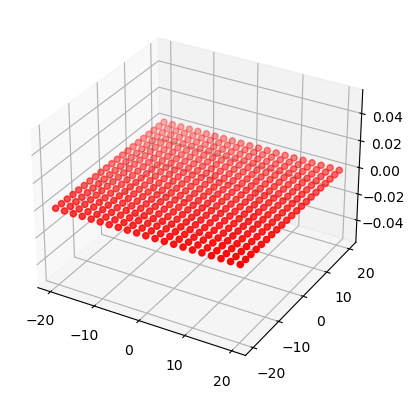

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Hole:
    def __init__(self, center_x, center_y, center_z, diameter):
        self.center_x = center_x
        self.center_y = center_y
        self.center_z = center_z
        self.diameter = diameter

    def __repr__(self):
        return f"Hole(center_x={self.center_x}, center_y={self.center_y}, center_z={self.center_z}, diameter={self.diameter})"
    
class Grid:
    def __init__(self, size_x, size_y, size_z, hole_diameter, separation):
        self.size_x = size_x
        self.size_y = size_y
        self.size_z = size_z
        self.hole_diameter = hole_diameter
        self.separation = separation
        self.holes = self.create_3d_grid()

    def create_3d_grid(self):
        holes = []
        center_x_offset = ((self.size_x - 1) * self.separation) / 2
        center_y_offset = ((self.size_y - 1) * self.separation) / 2
        center_z_offset = ((self.size_z - 1) * self.separation) / 2
        for x in range(self.size_x):
            for y in range(self.size_y):
                for z in range(self.size_z):
                    hole = Hole(center_x=x*self.separation - center_x_offset, 
                                 center_y=y*self.separation - center_y_offset, 
                                 center_z=z*self.separation - center_z_offset, 
                                 diameter=self.hole_diameter)
                    holes.append(hole)
        return holes

    def plot(self, ax=None):
        xs = [hole.center_x for hole in self.holes]
        ys = [hole.center_y for hole in self.holes]
        zs = [hole.center_z for hole in self.holes]
        
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(xs, ys, zs, c='red')

    def add_to_plot(self, ax):
        self.plot(ax)

    def is_point_in_a_hole(self, point):
        x1, y1, z1 = point
        hole_radius = self.hole_diameter / 2

        # Calculate the indices of the hole the point would belong to if it was in a hole
        x_index = round(x1 / self.separation)
        y_index = round(y1 / self.separation)
        z_index = round(z1 / self.separation)

        # Calculate the center of that hole
        x_center = x_index * self.separation
        y_center = y_index * self.separation
        z_center = z_index * self.separation

        # Check if the point is inside the hole
        # return ((x_center - x1)**2 + (y_center - y1)**2 + (z_center - z1)**2) <= hole_radius**2
        return (x_center - hole_radius <= x1 <= x_center + hole_radius and
                y_center - hole_radius <= y1 <= y_center + hole_radius and
                z_center - hole_radius <= z1 <= z_center + hole_radius)

# Specify the grid size, hole diameter, and separation
size_x, size_y, size_z = 21, 21, 1
hole_diameter = 1
separation = 2

# Create an instance of the Grid class
grid = Grid(size_x, size_y, size_z, hole_diameter, separation)

# Print the first hole in the grid
print(grid.holes[0])

# Use the plot method of the Grid class to create the 3D scatter plot
grid.plot()



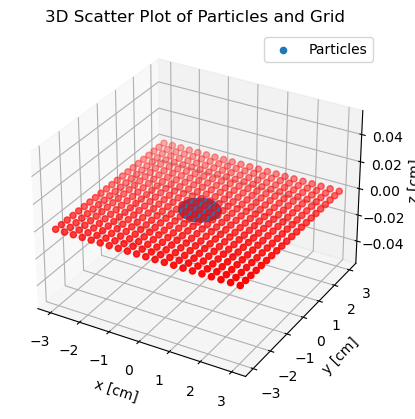

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming `data` is a list of `Particle` instances
x = [particle.x for particle in data]
y = [particle.y for particle in data]
z = [particle.z for particle in data]  # Use the z parameter of the particle instances

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of x, y, z of the particles
ax.scatter(x, y, z, label='Particles')

# Specify the grid size, hole diameter, and separation
size_x, size_y, size_z = 21, 21, 1
hole_diameter = 0.03
separation = 0.3

# Now create the grid of holes and add to the plot
grid = Grid(size_x, size_y, size_z, hole_diameter, separation)
grid.add_to_plot(ax)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_zlabel('z [cm]')
plt.title('3D Scatter Plot of Particles and Grid')
plt.legend()
plt.show()


Actual process

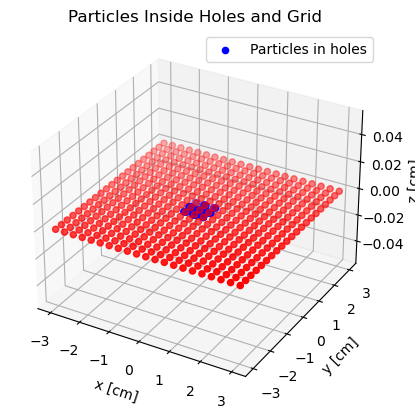

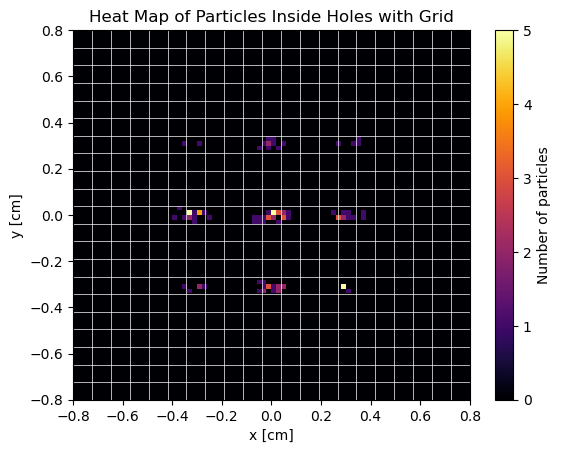

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

size_x, size_y, size_z = 21, 21, 1
hole_diameter = 0.01
separation = 0.3
# shrinking to 0.1 creates higher fidelity image

grid = Grid(size_x, size_y, size_z, hole_diameter, separation)

particles_in_holes = []
for particle in data:
    point = (particle.x, particle.y, particle.z)
    if grid.is_point_in_a_hole(point):
        particles_in_holes.append(particle)

for particle in particles_in_holes:
    particle.propagate(10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

if particles_in_holes:
    x_in_holes = [particle.x for particle in particles_in_holes]
    y_in_holes = [particle.y for particle in particles_in_holes]
    z_in_holes = [particle.z for particle in particles_in_holes]

    ax.scatter(x_in_holes, y_in_holes, z_in_holes, c='blue', label='Particles in holes')

grid.add_to_plot(ax)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_zlabel('z [cm]')
plt.title('Particles Inside Holes and Grid')
plt.legend()
plt.show()

# HEAT MAP CODE

import numpy as np
import matplotlib.pyplot as plt

bins_hist = 80
bins_grid = 21

edges_hist = np.linspace(-0.8, 0.8, bins_hist + 1)
edges_grid = np.linspace(-0.8, 0.8, bins_grid + 1)

H, _, _ = np.histogram2d(x_in_holes, y_in_holes, bins=[edges_hist, edges_hist])

fig, ax = plt.subplots()

pcm = ax.pcolormesh(edges_hist, edges_hist, H.T, cmap='inferno')

cbar = fig.colorbar(pcm, ax=ax, label='Number of particles')

for edge in edges_grid:
    ax.axhline(edge, color='white', linewidth=0.5)
    ax.axvline(edge, color='white', linewidth=0.5)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
plt.title('Heat Map of Particles Inside Holes with Grid')
plt.show()


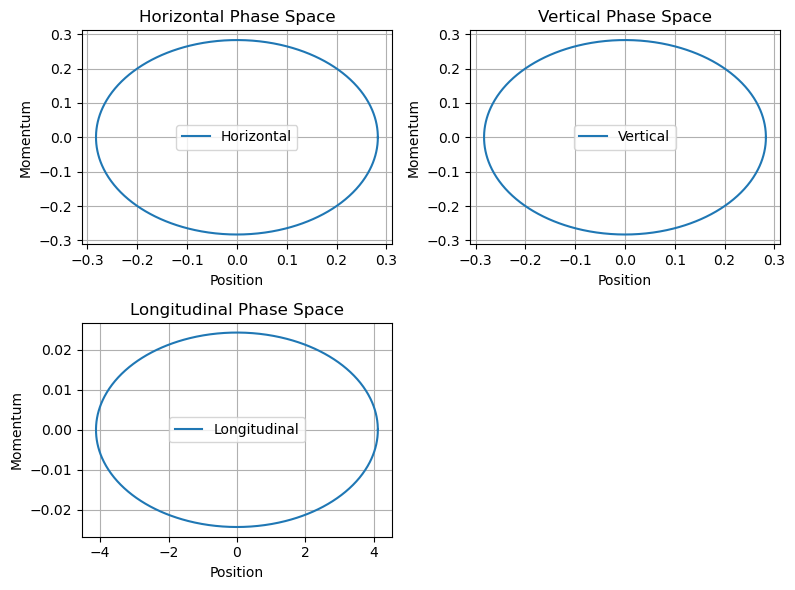

In [124]:
import numpy as np
import matplotlib.pyplot as plt

epsnx = 0.08  # Full normalized horizontal emittance in pi*cm*mrad
epsny = 0.08  # Full normalized vertical emittance in pi*cm*mrad
epsnz = 0.1  # Longitudinal emittance in dW/W(%)

alphz = -0.55  # Longitudinal Twiss parameter (alpha) [unitless]
betz = 170.0  # Longitudinal Twiss parameter (beta) [deg/%]

freqb = 1  # Frequency in Hz of the beam (1 for DC immediately after source, varied for RF)

theta = np.linspace(0, 2 * np.pi, 1000)

x = np.sqrt(epsnx) * np.cos(theta)
px = -np.sqrt(epsnx) * np.sin(theta)
y = np.sqrt(epsny) * np.cos(theta)
py = -np.sqrt(epsny) * np.sin(theta)

z = np.sqrt(epsnz * betz) * np.cos(theta)
pz = -np.sqrt(epsnz / betz) * np.sin(theta)

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot(x, px, label='Horizontal')
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Horizontal Phase Space')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(y, py, label='Vertical')
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Vertical Phase Space')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(z, pz, label='Longitudinal')
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Longitudinal Phase Space')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


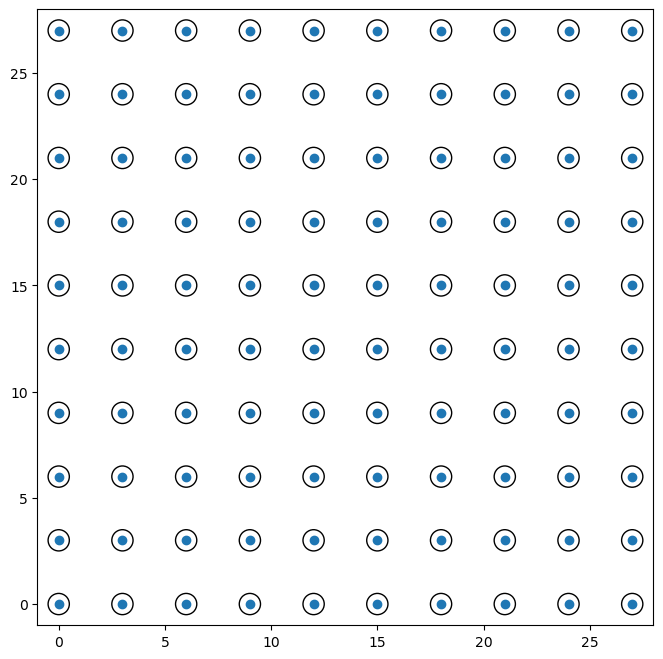

In [125]:
import matplotlib.pyplot as plt
import numpy as np

diameter = 1
separation = 3
size_x = size_y = 10
z_slice = 0

x, y = np.meshgrid(np.arange(size_x) * separation, np.arange(size_y) * separation)

plt.figure(figsize=(8, 8))
plt.scatter(x, y)

# Display the circumferences of the holes
for i in range(size_x):
    for j in range(size_y):
        circle = plt.Circle((i * separation, j * separation), diameter / 2, fill=False)
        plt.gca().add_patch(circle)

# Adjust the plot limits to include all circles
plt.xlim(-diameter, (size_x - 1) * separation + diameter)
plt.ylim(-diameter, (size_y - 1) * separation + diameter)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
